# Análise exploratória da base Auto MPG

In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Vamos fazer uma análise exploratória sobre um dataset sobre carros.

Fonte: [Auto MPG dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [2]:
def regress(X,Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return model, results

In [3]:
data = pd.read_csv("auto_mpg_sub.csv")

**Dicionário de dados:**


Variável | Descrição
:---:|---:
mpg | consumo em miles per gallon
cylinders | número de cilindros do motor do carro
displacement | deslocamento dos cilindros em polegadas cúbicas
horsepower | potência do veículo (HP)
weight | peso do veículo (libras)
acceleration | aceleração do veículo
model year | ano do modelo
origin | origem - veja abaixo
car name | nome do carro



In [4]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']]

In [6]:
np.sum(df.isnull())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

In [7]:
Y = df['mpg']

In [8]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']]

### Novo teste

Vamos refazer o modelo eliminando os maiores p-values (**por quê?**) para tentar melhorar o poder explicativo do nosso modelo

In [9]:
X2 = df[['displacement',  'weight',
       'model year']]

In [10]:
model, results = regress(X2, Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     544.9
Date:                Tue, 23 Oct 2018   Prob (F-statistic):          1.08e-138
Time:                        08:54:38   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2083.
Df Residuals:                     388   BIC:                             2099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.3633      4.021     -3.572      0.000     -22.268      -6.458
displacement     0.0003      0.005      0.060      0.952      -0.009       0.010
weight          -0.0067      0.001    -11.670      0.000      -0.008      -0.006
model year       0.7580      0.051     14.863      0.000       0.658       0.858
==============================================================================
Omnibus:                       42.445   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.902
Skew:                           0.669   Prob(JB):                     2.44e-16
Kurtosis:                       4.616   Cond. No.                     7.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ainda mais um teste, e gráfico

In [11]:
X3 = df[['weight',
       'model year']]
model, results = regress(X3, Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Tue, 23 Oct 2018   Prob (F-statistic):          3.33e-140
Time:                        08:54:38   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
npoints = 100
weight = np.linspace(X3["weight"].min(), X3["weight"].max(), npoints)
year = np.linspace(X3["model year"].min(), X3["model year"].max(), npoints)


In [13]:
weight_xx, year_yy = np.meshgrid(weight, year)

In [14]:
z = model.predict(weight_xx, year_yy)

<IPython.core.display.Javascript object>


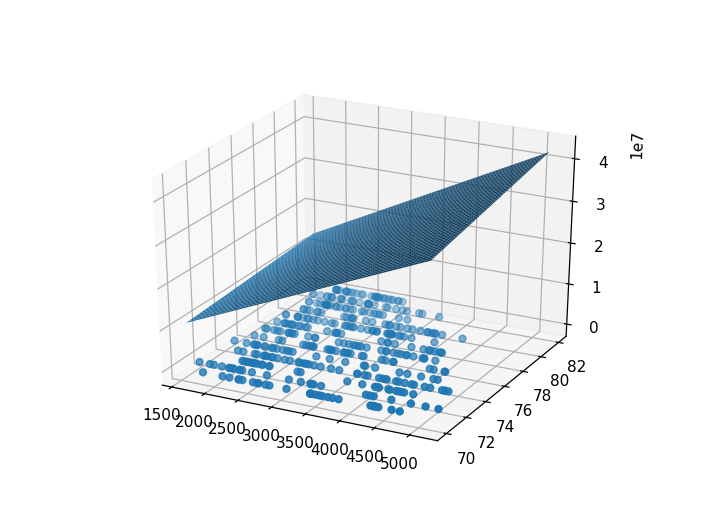

In [15]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(weight_xx, year_yy, z)
plt3d.scatter(X3["weight"],X3["model year"], Y )